In [1]:
import numpy as np
import os

import datastream as ds
from  model import Model


In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
SEQ_LEN      = 64
N_FEATURES   = 8
Z_DIM        = 32

dataroot  = "data/session_2"
modelroot = "models/session_2r"
suits     = [1]
sources   = "load"

dataserver = ds.Dataserver(SEQ_LEN , N_FEATURES, suits, sources, dataroot = dataroot)

model = Model(suits[0], SEQ_LEN , N_FEATURES, Z_DIM, modelroot, None)
model.load(modelroot)


ch 1 | Loaded samples: 160542


In [4]:
encodings = []
i = 0
while i < (dataserver.get_size(suits[0]) - SEQ_LEN):
    print(f"Loop {i}")

    sample = dataserver.get_sequence(suits[0], i, SEQ_LEN)
    sample = sample.reshape((SEQ_LEN, 1, N_FEATURES))

    encoding = model.get_latents(sample)
    encoding = encoding.squeeze()

    encodings.append(encoding)

    i += SEQ_LEN

encodings = np.stack(encodings, axis = 0)

00
Loop 49664
Loop 49728
Loop 49792
Loop 49856
Loop 49920
Loop 49984
Loop 50048
Loop 50112
Loop 50176
Loop 50240
Loop 50304
Loop 50368
Loop 50432
Loop 50496
Loop 50560
Loop 50624
Loop 50688
Loop 50752
Loop 50816
Loop 50880
Loop 50944
Loop 51008
Loop 51072
Loop 51136
Loop 51200
Loop 51264
Loop 51328
Loop 51392
Loop 51456
Loop 51520
Loop 51584
Loop 51648
Loop 51712
Loop 51776
Loop 51840
Loop 51904
Loop 51968
Loop 52032
Loop 52096
Loop 52160
Loop 52224
Loop 52288
Loop 52352
Loop 52416
Loop 52480
Loop 52544
Loop 52608
Loop 52672
Loop 52736
Loop 52800
Loop 52864
Loop 52928
Loop 52992
Loop 53056
Loop 53120
Loop 53184
Loop 53248
Loop 53312
Loop 53376
Loop 53440
Loop 53504
Loop 53568
Loop 53632
Loop 53696
Loop 53760
Loop 53824
Loop 53888
Loop 53952
Loop 54016
Loop 54080
Loop 54144
Loop 54208
Loop 54272
Loop 54336
Loop 54400
Loop 54464
Loop 54528
Loop 54592
Loop 54656
Loop 54720
Loop 54784
Loop 54848
Loop 54912
Loop 54976
Loop 55040
Loop 55104
Loop 55168
Loop 55232
Loop 55296
Loop 55360
Loop 55

In [129]:
from PIL import Image, ImageColor
from IPython.display import display
from scipy.special import softmax
import math

print(encodings.shape)

print( np.min(encodings), np.max(encodings))


def sigmoid(x):
  return 1 / (1 + np.exp(-x))

image = sigmoid(encodings)
#
std    = np.std(image, axis=0)
mean   = np.mean(image, axis=0)


(2508, 32)
-3.4491735 3.6974034


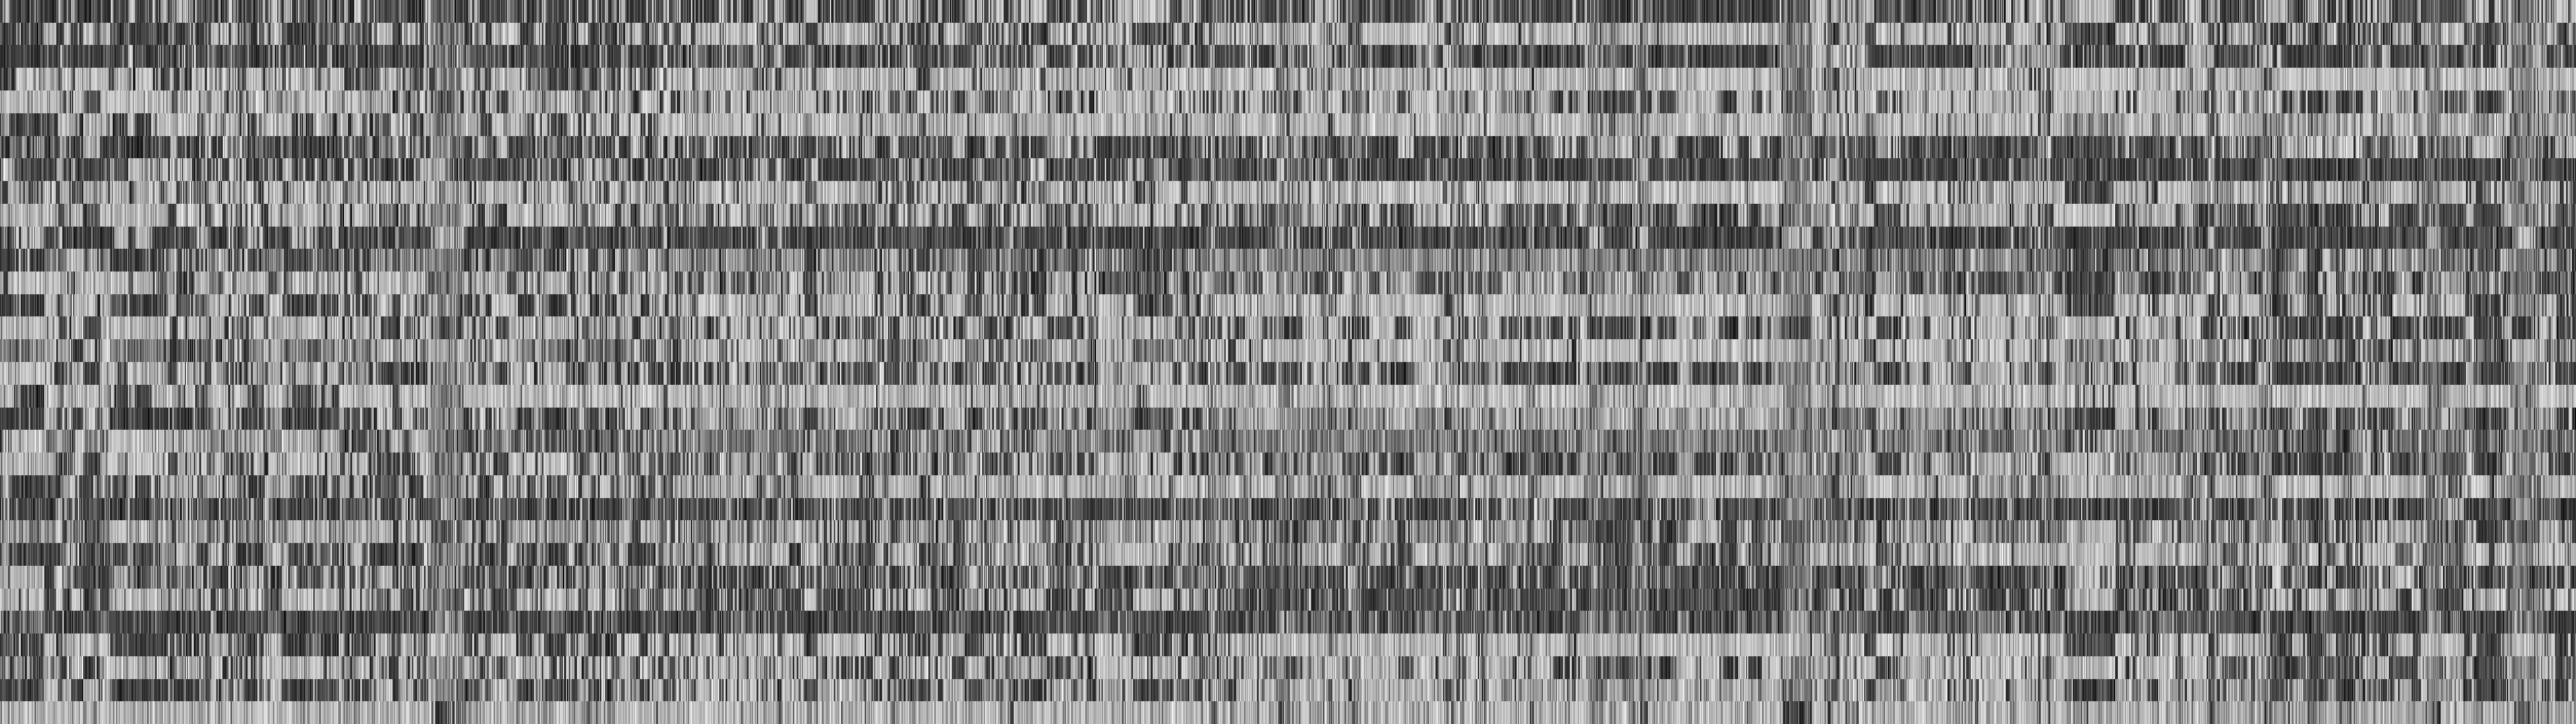

In [151]:

# colors = [ 
#         "#47b1b9",
#         "#499dbb",
#         "#4a8abd",
#         "#4c76be",
#         "#4e62c0",
#         "#504fc1",
#         "#6751c3",
#         "#7e52c5"]

colbase = np.array([
    ImageColor.getcolor("#47b1b9", "HSV"),
    ImageColor.getcolor("#499dbb", "HSV"),
    ImageColor.getcolor("#4a8abd", "HSV"),
    ImageColor.getcolor("#4c76be", "HSV"),
    ImageColor.getcolor("#4e62c0", "HSV"),
    ImageColor.getcolor("#504fc1", "HSV"),
    ImageColor.getcolor("#6751c3", "HSV"),
    ImageColor.getcolor("#7e52c5", "HSV")
])


def lerp(t, x, y):
    return x + (y - x ) * t
 


v = image.reshape((image.shape[0], image.shape[1], 1))
s = std.repeat(encodings.shape[0]).reshape((encodings.shape[0], encodings.shape[1], 1) ,  order='F')
h = mean.repeat(encodings.shape[0]).reshape((encodings.shape[0], encodings.shape[1], 1),  order='F')

h = lerp(h, 0.0, 1.0)
s = lerp(s, 0.0, 0.0)
v = lerp(v, 0.0, 1.0)


img = np.concatenate((h,s,v), axis=-1)
img = np.clip((img * 255).astype(np.uint8),0,255)

img = Image.fromarray(img, mode="HSV" ).convert("RGB")
img = img.rotate(90, expand=True)
img = img.resize([1920 * 2, 1080], resample=Image.NEAREST)
img.save("figures/encodings_2.jpg")

display(img)